This is an analysis looking at the income of individuals with a Bachelors, Masters, and Ph.D. from the 2013 ACS.

Let's dive in!

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Stats
from scipy import stats

#plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# allows plotting viewed in the notebook
%matplotlib inline

In [2]:
# Load dataset
data = pd.read_csv('ss13pusa.csv')

# Take a preview of the data
data.head()

,RT,SERIALNO,SPORDER,PUMA,ST,ADJINC,PWGTP,AGEP,CIT,CITWP,...,pwgtp71,pwgtp72,pwgtp73,pwgtp74,pwgtp75,pwgtp76,pwgtp77,pwgtp78,pwgtp79,pwgtp80
0,P,84,1,2600,1,1007549,65,19,1,NaN,...,68,6,5,127,119,63,68,67,64,122
1,P,154,1,2500,1,1007549,51,55,1,NaN,...,87,52,60,84,50,15,15,20,50,16
2,P,154,2,2500,1,1007549,62,56,1,NaN,...,96,57,70,116,60,17,21,19,58,18
3,P,154,3,2500,1,1007549,232,21,1,NaN,...,346,259,248,422,284,91,68,72,195,94
4,P,154,4,2500,1,1007549,97,21,1,NaN,...,186,84,87,180,88,25,25,23,101,36


In [3]:
# Create dataframe with the data I want to analyze

degrees =data[['SCHL','SEX', 'PINCP', 'RAC1P']]

# Remove any null entries

degree_holders = degrees.dropna()

In [4]:
# Filtering entries with a Bachelors, Masters, or Ph.D

degree_holders = degree_holders.loc[degree_holders['SCHL'] >= 21]
degree_holders = degree_holders.loc[degree_holders['SCHL'] != 23]

# Filtering entries with a income of $1,000 or more

degree_holders = degree_holders.loc[degree_holders['PINCP'] >= 1000]

In [5]:
# Changing the dataframe to show sex labels (Male, or Female) instead of binary coding

def change_sex(Sex):
    SEX = Sex
    
    if SEX == 1:
        return 'Male'
    else:
        return 'Female'

In [6]:
degree_holders['Sex'] = degree_holders['SEX'].apply(change_sex)

In [7]:
# Changing dataframe to show degree labels (Bachelors, Masters, or Ph.D.) instead of numerical representations

def change_degree(Degree):

    
    if Degree == 21:
        return 'Bachelors'
    elif Degree == 22:
        return 'Masters'
    else:
        return 'Ph.D'

In [8]:
degree_holders['Degree'] = degree_holders['SCHL'].apply(change_degree)

In [9]:
# Changing dataframe to show race labels (White, Black, American Indian, etc.) instead of numerical representations

def change_race(Race):

    
    if Race == 1:
        return 'White'
    elif Race == 2:
        return 'Black'
    elif Race == 3:
        return 'American Idian'
    elif Race == 4:
        return 'Alaska Native'
    elif Race == 5:
        return 'American Indian and Alaska Native'
    elif Race == 6:
        return 'Asian'
    elif Race == 7:
        return 'Native Hawaiian and Other Pacific Islander'
    elif Race == 8:
        return 'Some Other Race'
    else:
        return 'Two or More'

In [10]:
degree_holders['Race'] = degree_holders['RAC1P'].apply(change_race)

In [11]:
# Let's get a view of the data by degree

degree_holders['Degree'].value_counts()

Bachelors    201804
Masters       89548
Ph.D          15990
Name: Degree, dtype: int64

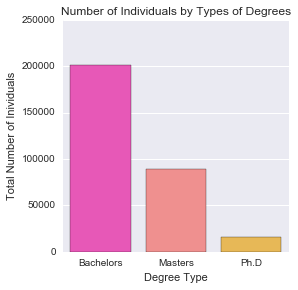

In [12]:
# Visualizing the data by degree obtained

sns.factorplot('Degree', data= degree_holders, kind = 'count', order= ['Bachelors', 'Masters', 'Ph.D'], palette= 'spring')
plt.title('Number of Individuals by Types of Degrees')
plt.xlabel('Degree Type')
plt.ylabel('Total Number of Inividuals')

You can see that the higher level of degree, the lower number of people earned that degree.

In [13]:
# Let's get a view of the data by Degree type and by sex

degree_holders['Sex'].groupby(degree_holders['Degree']).value_counts()

Degree     Sex   
Bachelors  Female    102881
           Male       98923
Masters    Female     48537
           Male       41011
Ph.D       Male        9759
           Female      6231
Name: Sex, dtype: int64

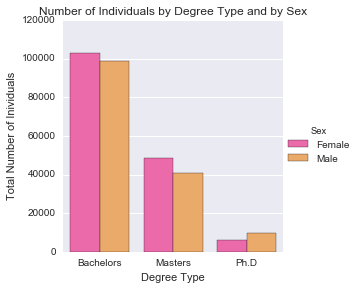

In [14]:
# Visualizing the data by degree type and by sex

sns.factorplot('Degree', data= degree_holders, hue= 'Sex', kind = 'count', 
               palette= 'spring', order= ['Bachelors', 'Masters', 'Ph.D'])
plt.title('Number of Individuals by Degree Type and by Sex')
plt.xlabel('Degree Type')
plt.ylabel('Total Number of Inividuals')

The data shows that females have more degrees obtained than males in the Bachelors and Masters level, however males have more degrees obtained at the Ph.D. level than females.

In [15]:
# Let's see the data on income by degree type

degree_holders['PINCP'].groupby(degree_holders['Degree']).describe()


Degree          
Bachelors  count    2.018040e+05
           mean     6.153216e+04
           std      6.850476e+04
           min      1.000000e+03
           25%      2.290000e+04
           50%      4.500000e+04
           75%      7.515000e+04
           max      1.272000e+06
Masters    count    8.954800e+04
           mean     7.745378e+04
           std      7.901388e+04
           min      1.000000e+03
           25%      3.480000e+04
           50%      5.900000e+04
           75%      9.300000e+04
           max      1.272000e+06
Ph.D       count    1.599000e+04
           mean     1.056032e+05
           std      1.008143e+05
           min      1.000000e+03
           25%      4.500000e+04
           50%      8.000000e+04
           75%      1.260000e+05
           max      9.460000e+05
Name: PINCP, dtype: float64

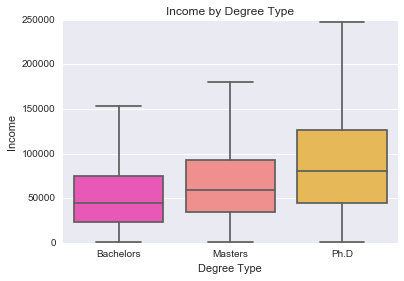

In [16]:
# Let's visualize those numbers

sns.boxplot('Degree','PINCP', data= degree_holders, order= ['Bachelors', 'Masters', 'Ph.D'], 
            palette= 'spring', showfliers= False)
plt.title('Income by Degree Type')
plt.xlabel('Degree Type')
plt.ylabel('Income')


As the data shows, with each higher degree earned an individual is likely to earn a higher income.

All outliers have been removed in this visualization.

In [17]:
# Let's see the data on income by degree type and by sex

degree_holders['PINCP'].groupby((degree_holders['Degree'], degree_holders['Sex'])).describe()

Degree     Sex          
Bachelors  Female  count    1.028810e+05
                   mean     4.706326e+04
                   std      4.926434e+04
                   min      1.000000e+03
                   25%      1.800000e+04
                   50%      3.600000e+04
                   75%      6.000000e+04
                   max      7.800000e+05
           Male    count    9.892300e+04
                   mean     7.657998e+04
                   std      8.127345e+04
                   min      1.000000e+03
                   25%      3.000000e+04
                   50%      5.505000e+04
                   75%      9.450000e+04
                   max      1.272000e+06
Masters    Female  count    4.853700e+04
                   mean     6.040869e+04
                   std      5.381802e+04
                   min      1.000000e+03
                   25%      3.000000e+04
                   50%      5.000000e+04
                   75%      7.500400e+04
                   max      8.50

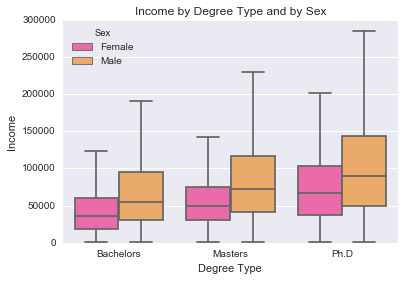

In [18]:
# Let's visualize those numbers

sns.boxplot('Degree','PINCP', data= degree_holders, hue= 'Sex', order= ['Bachelors', 'Masters', 'Ph.D'],
            palette= 'spring', showfliers= False)
plt.title('Income by Degree Type and by Sex')
plt.xlabel('Degree Type')
plt.ylabel('Income')

This shows that males on average earn a higher median wage than females within each degree type. This current data is not taking into consideration income earned by degree field which could play a factor.

In [19]:
# Let's see the data on income by race and by degree type

degree_holders['PINCP'].groupby((degree_holders['Race'], degree_holders['Degree'])).describe()

Race            Degree          
Alaska Native   Bachelors  count    4.000000e+01
                           mean     6.230750e+04
                           std      6.495843e+04
                           min      7.650000e+03
                           25%      3.119500e+04
                           50%      4.310000e+04
                           75%      6.673250e+04
                           max      3.858700e+05
                Masters    count    1.400000e+01
                           mean     4.862357e+04
                           std      3.067075e+04
                           min      1.208000e+04
                           25%      2.287500e+04
                           50%      4.977500e+04
                           75%      5.622500e+04
                           max      1.150000e+05
                Ph.D       count    4.000000e+00
                           mean     5.239500e+04
                           std      3.890207e+04
                           min      

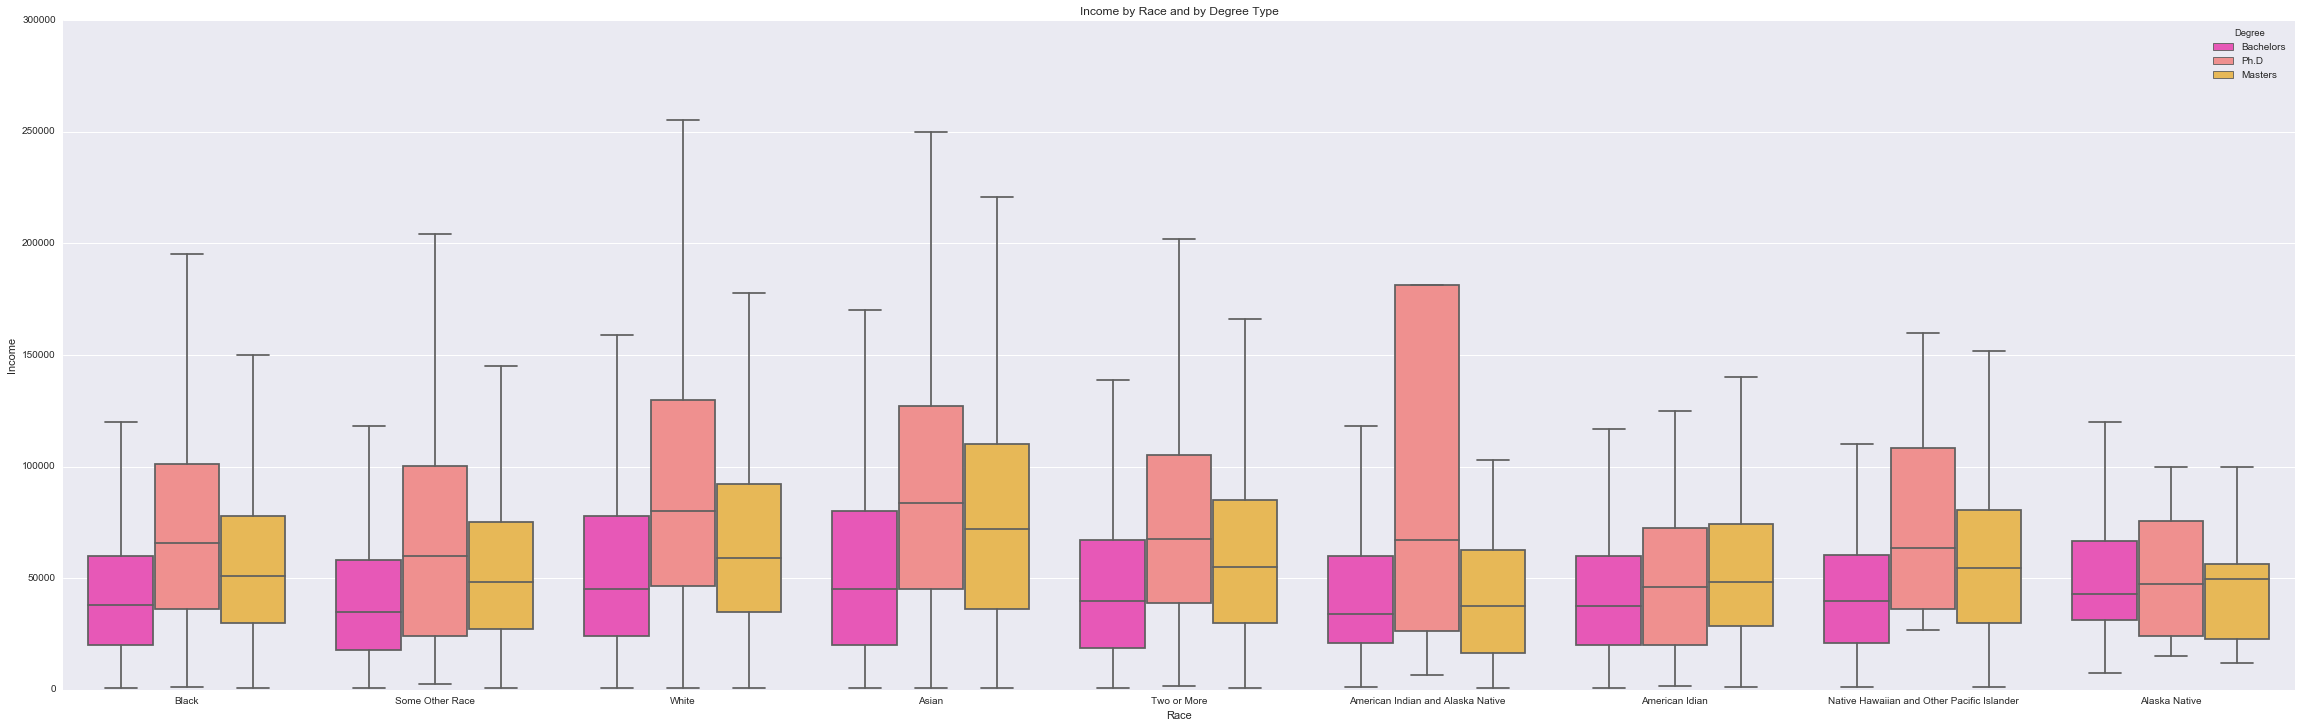

In [23]:
# Let's visualize those numbers
# You can double-click on the graph to enlarge it for easier viewing

plt.figure(figsize=(40, 12))
sns.boxplot('Race','PINCP', data= degree_holders, hue= 'Degree', palette= 'spring', showfliers= False)

plt.title('Income by Race and by Degree Type')
plt.xlabel('Race')
plt.ylabel('Income')


In [21]:
# Let's see the data on income by race, by sex, and by degree type

degree_holders['PINCP'].groupby((degree_holders['Race'], degree_holders['Sex'], degree_holders['Degree'])).describe()

Race           Sex     Degree          
Alaska Native  Female  Bachelors  count    1.900000e+01
                                  mean     4.019789e+04
                                  std      2.163107e+04
                                  min      7.650000e+03
                                  25%      2.838000e+04
                                  50%      4.028000e+04
                                  75%      5.251500e+04
                                  max      8.978000e+04
                       Masters    count    1.000000e+01
                                  mean     5.714300e+04
                                  std      3.118281e+04
                                  min      1.648000e+04
                                  25%      4.345250e+04
                                  50%      5.575000e+04
                                  75%      5.923500e+04
                                  max      1.150000e+05
                       Ph.D       count    2.000000e+00
        

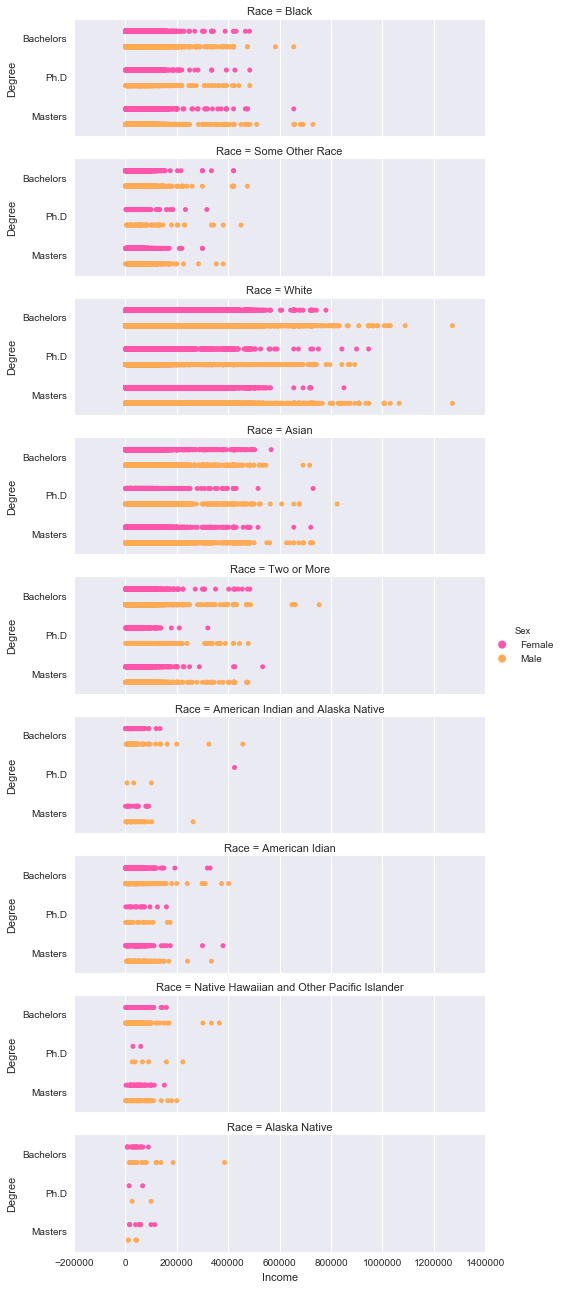

In [22]:
# Let's visualize the data. 
# So it's easier to read, each race will be plotted in it's own graph divided by degree type and sex

sns.factorplot('PINCP', 'Degree', hue= 'Sex', row= 'Race', data = degree_holders, 
               orient= 'h', size=2, aspect=3.5, palette= 'spring',
              kind = 'strip', split=True)

plt.xlabel('Income')